In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path= r"C:\Users\galia\OneDrive\Escritorio\DA course\6.1\Data"

In [4]:
df=pd.read_pickle(os.path.join(path,"df_boats_cleaned1.pkl"))

In [5]:
df.shape

(9192, 10)

In [6]:
df.head()

,boat_type,manufacturer,type,year_built,length,width,material,views_last_7_days,value_in_eur,country
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,unknown,226,3337.0,Switzerland
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.0,Germany
2,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,unknown,64,3367.0,Denmark
3,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.0,Germany
4,Catamaran,unknown,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,3600.0,Switzerland


### 2 Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).
###### Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.

In [7]:
#### Dropping not numerical columns
df_un=df.drop(columns = ['boat_type','manufacturer','type','material','country'])


In [8]:
df_un

,year_built,length,width,views_last_7_days,value_in_eur
0,2017,4.00,1.90,226,3337.0
1,2020,4.00,1.50,75,3490.0
2,2020,3.00,1.00,64,3367.0
3,2019,3.55,1.46,58,3399.0
4,1999,6.20,2.38,474,3600.0
...,...,...,...,...,...
9187,1984,6.00,1.62,288,4950.0
9188,1987,6.30,2.44,1116,4900.0
9189,2020,4.40,1.80,354,4499.0
9190,2018,4.37,1.89,266,4300.0


### Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(df_un).score(df_un) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\galia\anaconda32\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\galia\anaconda32\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\galia\anaconda32\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\galia\anaconda32\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\galia\anaconda32\lib\site-packages\sklearn\

[-8004063454161737.0,
 -3349598041632895.5,
 -1901214816062981.2,
 -1077042270842004.5,
 -740333458226609.2,
 -506349005403065.7,
 -364307031584878.9,
 -267632314671144.84,
 -206989129252029.28]

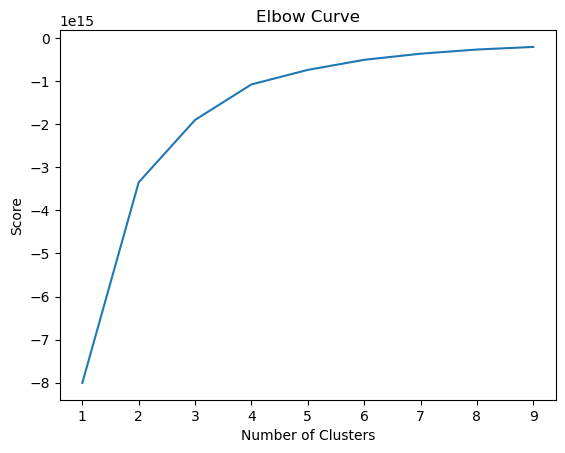

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### #Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.
#### Explain why you chose that number in a markdown cell.
#### If you run into any problems determining the optimal number of clusters using the elbow technique, reach out to your tutor for suggestions.

##### I will chosee 3 cluster, even if is not a so clear breaking point after that point it flatten more

### 5 Run the k-means algorithm.

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters=3) 

In [13]:
# Fit the k-means object to the data.

kmeans.fit(df_un)

C:\Users\galia\anaconda32\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [14]:
df_un['clusters'] = kmeans.fit_predict(df_un)

C:\Users\galia\anaconda32\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
df_un

,year_built,length,width,views_last_7_days,value_in_eur,clusters
0,2017,4.00,1.90,226,3337.0,0
1,2020,4.00,1.50,75,3490.0,0
2,2020,3.00,1.00,64,3367.0,0
3,2019,3.55,1.46,58,3399.0,0
4,1999,6.20,2.38,474,3600.0,0
...,...,...,...,...,...,...
9187,1984,6.00,1.62,288,4950.0,0
9188,1987,6.30,2.44,1116,4900.0,0
9189,2020,4.40,1.80,354,4499.0,0
9190,2018,4.37,1.89,266,4300.0,0


In [16]:
df_un['clusters'].value_counts()

0    9028
1     151
2      13
Name: clusters, dtype: int64

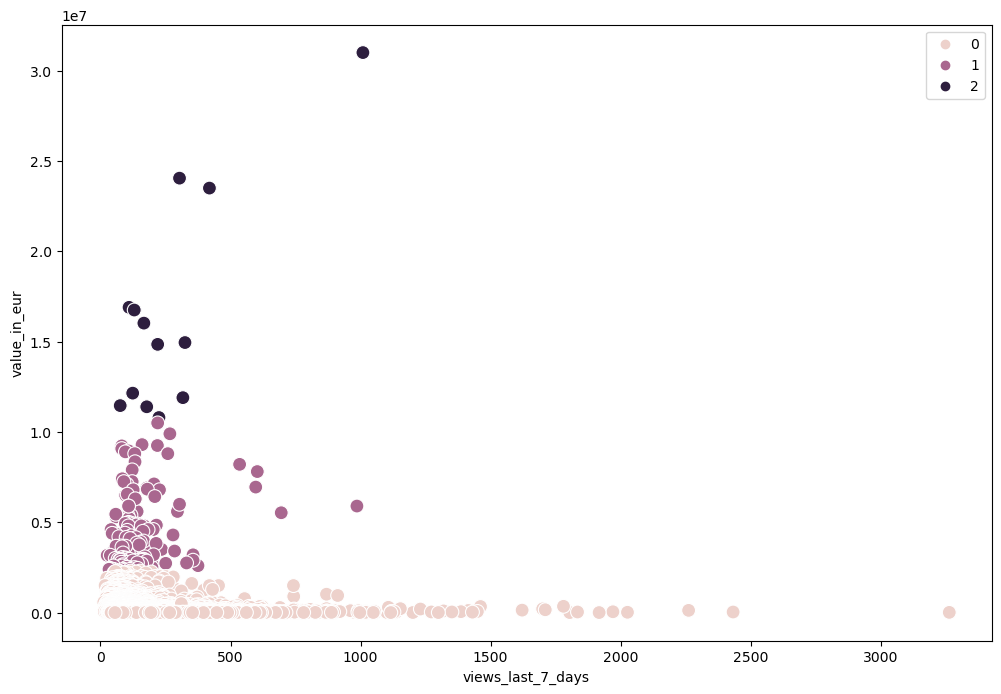

In [23]:
# Plot the clusters for the "value_in_eur" and "views_last_7_days" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_un['views_last_7_days'], y=df_un['value_in_eur'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('views_last_7_days') # Label x-axis.
plt.ylabel('value_in_eur') # Label y-axis.
plt.show()

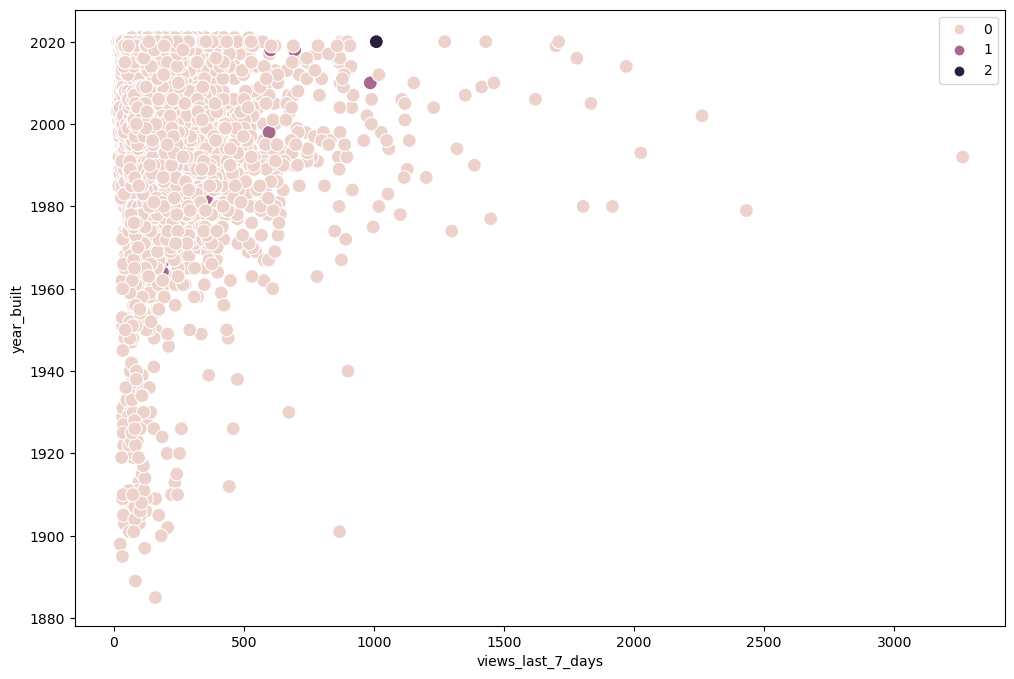

In [18]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_un['views_last_7_days'], y=df_un['year_built'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('views_last_7_days') 
plt.ylabel('year_built') 
plt.show()

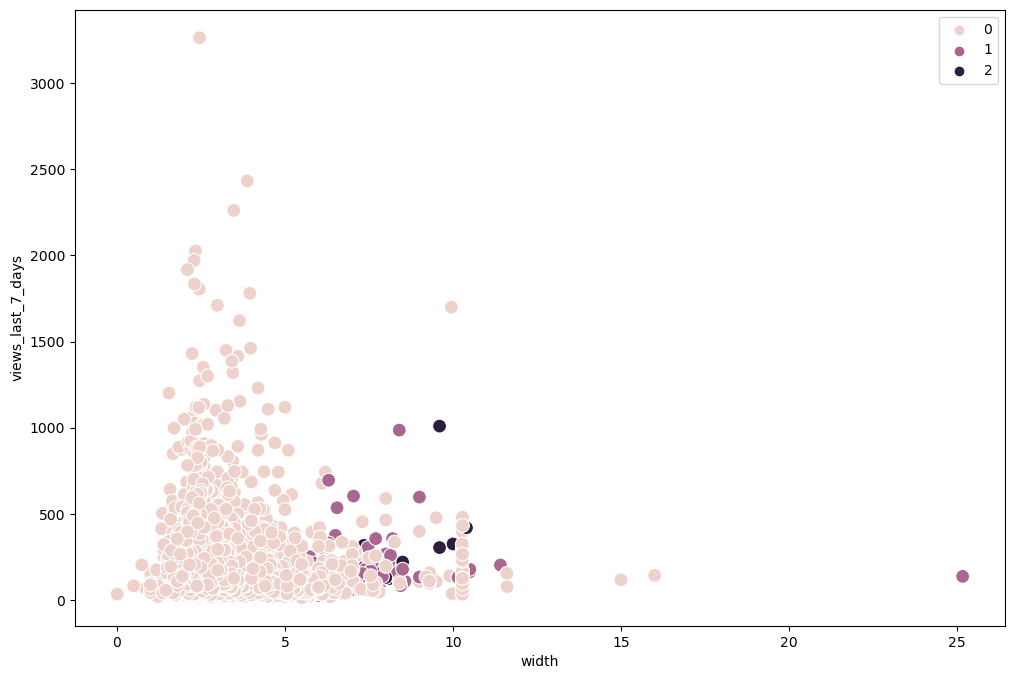

In [19]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_un['width'], y=df_un['views_last_7_days'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('width') 
plt.ylabel('views_last_7_days') 
plt.show()

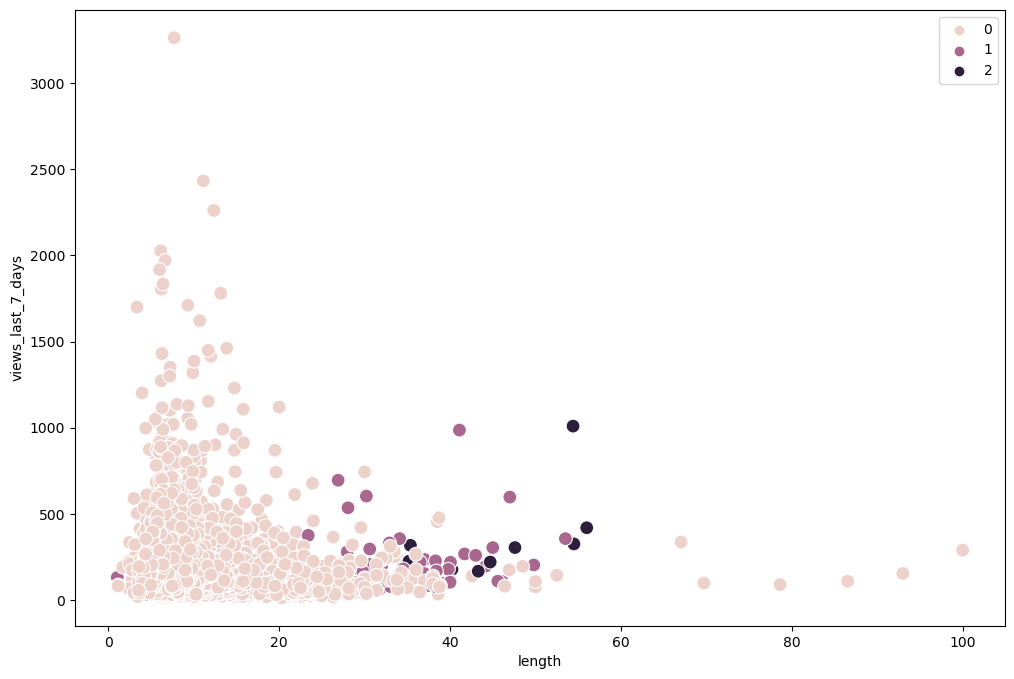

In [20]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_un['length'], y=df_un['views_last_7_days'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('length') 
plt.ylabel('views_last_7_days') 
plt.show()

### Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further. 

##### The most usefull information we can get from here is about price in eur , we can apreciate that most of the views comes from cheap units, the expensives ones just a few of them got above 1000 visits. Taking in consideration the graph we can say that cheap unit have a lot of visit, medium value got from 0 to 500.

##### For the lenght and wide most of the visit comes from smalls  to 20 fts boats

### Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [21]:
# renaming the clusters 
df_un.loc[df_un['clusters'] == 2, 'cluster'] = 'dark purple'
df_un.loc[df_un['clusters'] == 1, 'cluster'] = 'purple'
df_un.loc[df_un['clusters'] == 0, 'cluster'] = 'pink'

In [22]:
df_un.groupby('cluster').agg({'year_built':['mean', 'median'], 
                              'length':['mean', 'median'], 
                              'views_last_7_days':['mean', 'median'],
                              'value_in_eur':['mean', 'median'],
                              'width':['mean', 'median']})

year_built             length        views_last_7_days         \
                    mean  median       mean median              mean median   
cluster                                                                       
dark purple  2015.923077  2020.0  43.306923  40.23        277.230769  220.0   
pink         2004.797297  2008.0  11.408947  10.40        147.554719  107.0   
purple       2012.589404  2016.0  28.740993  27.00        148.225166  113.0   

             value_in_eur                 width         
                     mean      median      mean median  
cluster                                                 
dark purple  1.659456e+07  14950000.0  8.610000   8.20  
pink         2.093118e+05     93000.0  3.532100   3.36  
purple       4.428750e+06   3690000.0  6.961788   6.75

### Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

#### - We can apreciate that the dark purple group is the one that recieve mos visit in general, but they are also just a few and this can take the numbers up. this represent big and expensive units.
#### - For the other groups we can notice similar numbers in terms of views even if in the other stats they differ, we can observe a similar performance

### Propose what these results could be useful for in future steps of an analytics pipeline.

#### this give me an idea about the preferences and how market see the boats in terms of size we can notice that the most viewev are in lower and mid size units. Also we see that cheaper unit receive most of the visits.